# **praProcess section**

This file is mainly for preprocessing data, there are several simple models that are used to experiment and learn

- [End praProcess folder](#end-praprocess-folder) (this anchor may not work properly, make sure you find it up to heading 1 "End preProcess folder")
  - for data preprocess folder, this section will generate a folder containing all images with the format name "(class)_(id_patient).png"
- [End praProcess for all magnification](#end-praprocess-for-all-magnification) (this anchor may not work properly, make sure you find it up to heading 1 "End praProcess for all magnification")
  - must run until this section

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import sklearn
import shutil
import cv2
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
#Importing all the necessary libraries for image processing
import tensorflow as tf
from tensorflow import keras
from keras.layers import Conv2D, Flatten, Dense, Dropout, MaxPooling2D, BatchNormalization
from keras.models import Sequential, load_model
from keras.callbacks import EarlyStopping, Callback , ModelCheckpoint
from keras.metrics import Accuracy,binary_crossentropy, FalsePositives, FalseNegatives, TruePositives, TrueNegatives
from keras.preprocessing.image import ImageDataGenerator

In [3]:
os.getcwd()

'c:\\Users\\TOBI\\Downloads\\project-skripsi\\src'

## Folds.csv

1. Folds.csv contains all the information about the patient images.
2. Folds.csv consists of the magnifying factor of the image. the exact path where the image is stores.
3. So, We can extract useful information from the filename.
4. Here Folds.csv plays major role in designing the system.

In [4]:
# Loading the text file
fold_df = pd.read_csv("../Folds.csv")
fold_df.head(3)

,fold,mag,grp,filename
0,1,100,train,BreaKHis_v1/histology_slides/breast/benign/SOB...
1,1,100,train,BreaKHis_v1/histology_slides/breast/benign/SOB...
2,1,100,train,BreaKHis_v1/histology_slides/breast/benign/SOB...


In [5]:
fold_df.shape

(39545, 4)

In [6]:
# Defining the paths
classes = ["benign","malign"]

In [7]:
# Renaming the column filename to path
fold_df = fold_df.rename(columns = {"filename":"path"})
# Printing the head of the file
fold_df.head(3)

,fold,mag,grp,path
0,1,100,train,BreaKHis_v1/histology_slides/breast/benign/SOB...
1,1,100,train,BreaKHis_v1/histology_slides/breast/benign/SOB...
2,1,100,train,BreaKHis_v1/histology_slides/breast/benign/SOB...


In [8]:
# One example path is printed
fold_df['path'][1]

'BreaKHis_v1/histology_slides/breast/benign/SOB/adenosis/SOB_B_A_14-22549AB/100X/SOB_B_A-14-22549AB-100-002.png'

## Info path:

- From the path column we can extract the exact file name using apply and split functions on the path column.
- And also the class is extracted.

In [9]:
# Extracting the filename and label from the path column
fold_df['filename'] = fold_df['path'].apply(lambda x:x.split("/")[-1])
fold_df["label"] = fold_df['path'].apply(lambda x: x.split("/")[3])

In [25]:
fold_df.head(3)

,fold,mag,grp,path,filename,label,file_loc,class
0,1,100,train,BreaKHis_v1/histology_slides/breast/benign/SOB...,SOB_B_A-14-22549AB-100-001.png,benign,benign_SOB_B_A-14-22549AB-100-001.png,0
1,1,100,train,BreaKHis_v1/histology_slides/breast/benign/SOB...,SOB_B_A-14-22549AB-100-002.png,benign,benign_SOB_B_A-14-22549AB-100-002.png,0
2,1,100,train,BreaKHis_v1/histology_slides/breast/benign/SOB...,SOB_B_A-14-22549AB-100-003.png,benign,benign_SOB_B_A-14-22549AB-100-003.png,0


In [24]:
fold_df.shape

(39545, 8)

Creating New Directiory Cancer

- The given data consists of very complex structure of folders where it stores the images.
- The structure as follows:
  - BreaKHis_v1
    - histology_slides
      - breast
        - **benign**
          - **SOB**
            - Type - **patient_id**
            - 40x - 100x - 200x - 400x
        - **malignant**
          - **SOB**
            - Type - **patient_id**
            - 40x - 100x - 200x - 400x
- To make things simple, using the exact path of the images, all the images are moved to the common folder called Cancer.
- Images are renamed with their class and patient_id.


In [30]:
# Creating new directory for all images
os.makedirs("../Cancer/")
# Creating new directory for output saved model
os.mkdir("../src/output")

In [31]:
# Moving all the images to one folder
for p in fold_df['path']:
    src = "../" + p
    dest = "../Cancer/"
    #saving the files with its corresponding class and patient_id
    dest = os.path.join(dest, src.split("/")[4]+ "_" + src.split("/")[-1])
    shutil.copyfile(src,dest)

total must be 7909

In [32]:
# Checking the len
len(os.listdir("../Cancer/"))

7909

# End praProcess folder

- So far, the data has been collected into a folder with the following name format.
- you can stop at this section

In [33]:
# Creating a new data frame with labels and file names stored in single folder
fold_df['file_loc'] = fold_df['label'] + "_" + fold_df['filename']
# Encoding the class to integer
fold_df['class'] = fold_df['label'].apply(lambda x: 0 if x =='benign' else 1)

In [34]:
# Printing the head to display the changed made
fold_df.head(3)

,fold,mag,grp,path,filename,label,file_loc,class
0,1,100,train,BreaKHis_v1/histology_slides/breast/benign/SOB...,SOB_B_A-14-22549AB-100-001.png,benign,benign_SOB_B_A-14-22549AB-100-001.png,0
1,1,100,train,BreaKHis_v1/histology_slides/breast/benign/SOB...,SOB_B_A-14-22549AB-100-002.png,benign,benign_SOB_B_A-14-22549AB-100-002.png,0
2,1,100,train,BreaKHis_v1/histology_slides/breast/benign/SOB...,SOB_B_A-14-22549AB-100-003.png,benign,benign_SOB_B_A-14-22549AB-100-003.png,0


In [35]:
fold_df.tail(3)

,fold,mag,grp,path,filename,label,file_loc,class
39542,5,400,test,BreaKHis_v1/histology_slides/breast/malignant/...,SOB_M_PC-15-190EF-400-013.png,malignant,malignant_SOB_M_PC-15-190EF-400-013.png,1
39543,5,400,test,BreaKHis_v1/histology_slides/breast/malignant/...,SOB_M_PC-15-190EF-400-014.png,malignant,malignant_SOB_M_PC-15-190EF-400-014.png,1
39544,5,400,test,BreaKHis_v1/histology_slides/breast/malignant/...,SOB_M_PC-15-190EF-400-015.png,malignant,malignant_SOB_M_PC-15-190EF-400-015.png,1


In [36]:
print(fold_df.shape)

(39545, 8)


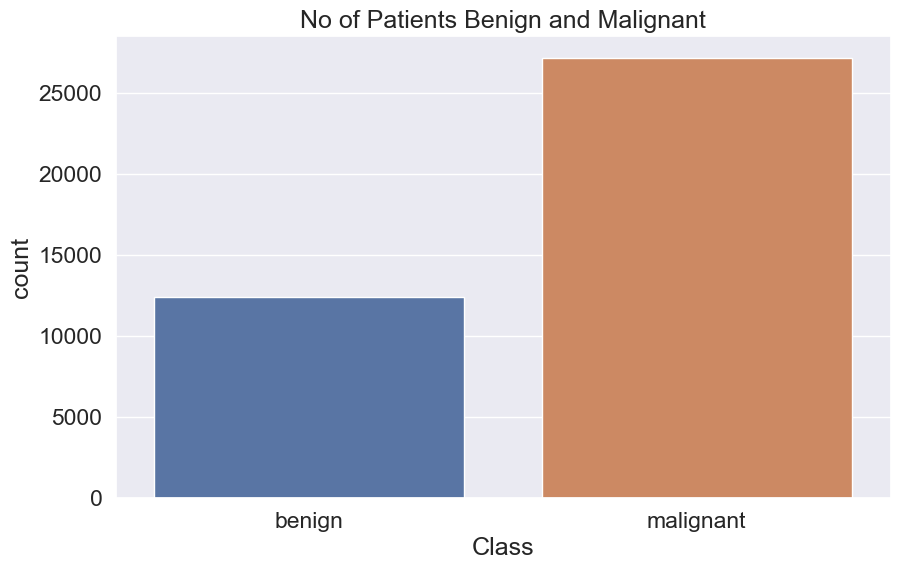

In [47]:
# Lets explore the data set
plt.figure(figsize=(10,6))
sns.set(font_scale = 1.5)
sns.set_style("darkgrid")
sns.countplot(x=fold_df['label']);
plt.xlabel("Class")
plt.title("No of Patients Benign and Malignant");

sum_benign    :  2480
sum_malignant :  5429


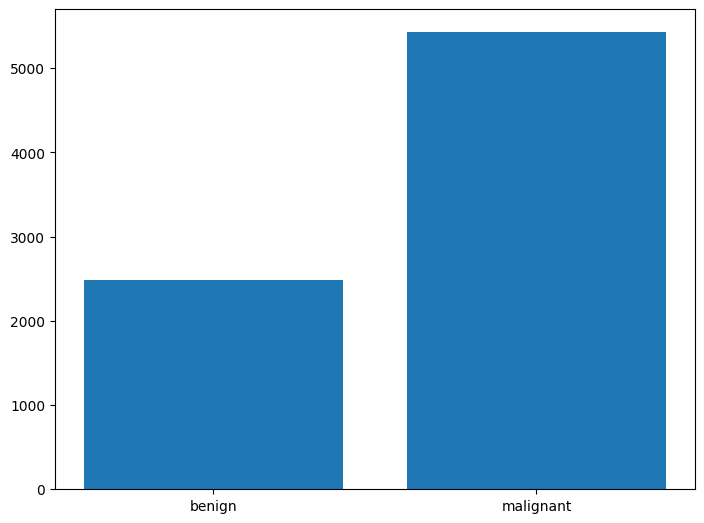

In [37]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
label_data = ['benign', 'malignant']
sum_benign = fold_df[(fold_df["class"] == 0) & (fold_df["fold"] == 1)].shape[0]
sum_malignant = fold_df[(fold_df["class"] == 1) & (fold_df["fold"] == 1)].shape[0]
print("sum_benign    : ", sum_benign)
print("sum_malignant : ", sum_malignant)
y_bar = [sum_benign, sum_malignant]
ax.bar(label_data, y_bar)
plt.show()

- Data is Highly Imabalanced as this is the case with the real world.
- Medical datas are usually imbalanced because of their nature.

In [38]:
# Filtering the data frame to benign and malignant for visualization
benign_df = fold_df[fold_df['label'] == 'benign']
malignant_df = fold_df[fold_df['label'] == 'malignant']

In [39]:
# Creating a new data frame with the file loc as its index, label and class of the patients as its columns.
df = pd.DataFrame(os.listdir("../Cancer/"))
df = df.rename(columns = {0:'file_loc'})
df['label'] = df['file_loc'].apply(lambda x:x.split("_")[0])
df['class'] = df['label'].apply(lambda x: 0 if x =='benign' else 1)
df.set_index("file_loc",inplace=True)

In [41]:
#Checking the data frame
df.head(2)

,label,class
file_loc,,
benign_SOB_B_A-14-22549AB-100-001.png,benign,0
benign_SOB_B_A-14-22549AB-100-002.png,benign,0


In [42]:
df.tail(2)

,label,class
file_loc,,
malignant_SOB_M_PC-15-190EF-400-014.png,malignant,1
malignant_SOB_M_PC-15-190EF-400-015.png,malignant,1


Using the data frame, the splitting for train, test and validation is done.
according to the research proposal plan, the distribution of the proportion of data is 
- 80%, 15%, 5% of training, test, and validation data

In [43]:
data_train_and_val, data_test = train_test_split(df, test_size = 0.15, random_state = 47)
#Traing and val
data_train, data_val = train_test_split(data_train_and_val, test_size = 0.05, random_state = 47)

In [44]:
print("Training size :", data_train.shape)
print("Validation size :", data_val.shape)
print("Testing size :", data_test.shape)

Training size : (6385, 2)
Validation size : (337, 2)
Testing size : (1187, 2)


<function matplotlib.pyplot.show(close=None, block=None)>

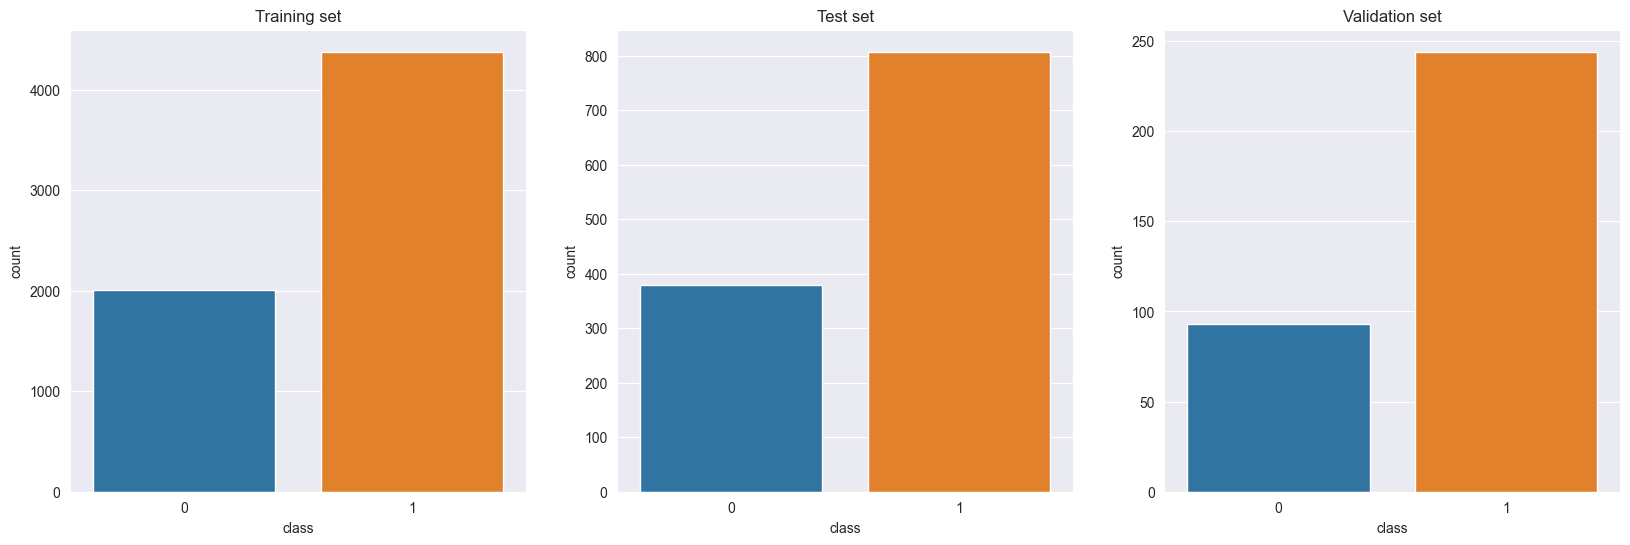

In [46]:
#Plotting
sns.set_style("darkgrid")
plt.figure(figsize = (20,6))
plt.subplot(1,3,1)
sns.countplot( x=data_train["class"])
plt.title("Training set")
plt.subplot(1,3,3)
sns.countplot(x=data_val['class'])
plt.title("Validation set")
plt.subplot(1,3,2)
sns.countplot(x=data_test['class']);
plt.title("Test set");
plt.show

In [48]:
#Separating the benign and malignant patients from train data
train_has_cancer = data_train[data_train['class'] == 1]
train_has_no_cancer = data_train[data_train['class'] == 0]

In [49]:
train_has_cancer.shape

(4378, 2)

In [50]:
train_has_no_cancer.shape

(2007, 2)

In [51]:
# Upsampling the minority class by the size of majority class with replacement
train_has_no_cancer_upsample = resample(train_has_no_cancer, n_samples = len(train_has_cancer), random_state = 47, replace = True)

In [52]:
#Concatenating the upsampled minority class and the majority class
data_train = pd.concat([train_has_cancer,train_has_no_cancer_upsample])

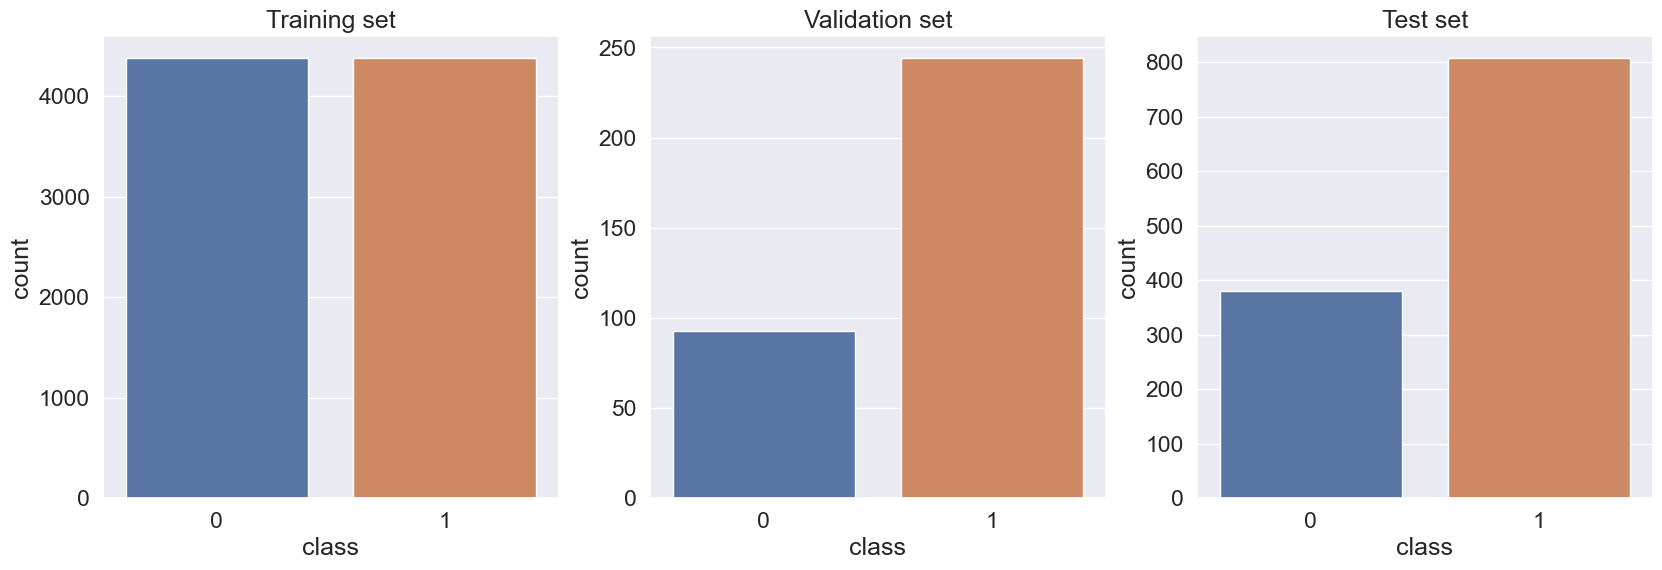

In [53]:
sns.set_style("darkgrid")
plt.figure(figsize = (20,6))
plt.subplot(1,3,1)
sns.countplot(x=data_train['class'])
plt.title("Training set")
plt.subplot(1,3,2)
sns.countplot(x=data_val['class'])
plt.title("Validation set")
plt.subplot(1,3,3)
sns.countplot(x=data_test['class']);
plt.title("Test set");

## Creating the directory structure for Training , Validation and Testing:
- Earlier all the images where stored in the single directory called Cancer.
- Now we are using Image data generator as part of our algorithm designing.
- Image data generator expects the Images to be in the following structure:
  - Train
    - enign
    - Malignant
  - Validation
    - Benign
    - Malignant
  - Testing
    - Benign
    - Malignant
- Above structure is the prerequisite for the Image Data Generator to run.

In [54]:
# Creating the directories to store images
os.makedirs("../dataset_used/Cancer_train")
os.makedirs("../dataset_used/Cancer_test")
os.makedirs("../dataset_used/Cancer_validation")
os.makedirs("../dataset_used/Cancer_train/benign")
os.makedirs("../dataset_used/Cancer_train/malignant")
os.makedirs("../dataset_used/Cancer_validation/benign")
os.makedirs("../dataset_used/Cancer_validation/malignant")
os.makedirs("../dataset_used/Cancer_test/benign")
os.makedirs("../dataset_used/Cancer_test/malignant")

- Using the above directories and the splitted data frames data_train, data_val, data_test.
- We are moving the images to the corresponding directories based on the class of the image(Benign or Malignant).

In [55]:
# Training data
i = 1
for img in data_train.index:
    if img!=".DS_Store":
        target = df.loc[img,'class']
        if target == 1:
            label = 'malignant'
        else:          
            label = 'benign'      
        src = os.path.join("../Cancer/",img)
        dest = os.path.join("../dataset_used/Cancer_train/",label, "image" + str(i)+".png")
        img1 = np.array(cv2.imread(src))
        cv2.imwrite(dest,img1)
        i = i+1

In [56]:
# Testing data
for img in data_test.index:
    target = data_test.loc[img,'class']
    if target == 1:
        label = 'malignant'
    else:
        label = 'benign'
        
    src = os.path.join("../Cancer/",img)
    dest = os.path.join("../dataset_used/Cancer_test/",label,img)
    shutil.copyfile(src,dest)

In [57]:
# Validation data
for img in data_val.index:
    target = data_val.loc[img,'class']
    if target == 1:
        label = 'malignant'
    else:
        label = 'benign'
        
    src = os.path.join("../Cancer/",img)
    dest = os.path.join("../dataset_used/Cancer_validation/",label,img)
    shutil.copyfile(src,dest)

In [59]:
# Checking their lengths
print("Training Data:")
print(" ")
print("Benign   :",len(os.listdir("../dataset_used/Cancer_train/benign/")))
print("Malignant:",len(os.listdir("../dataset_used/Cancer_train/malignant/")))
print(" ")
print("Testing Data:")
print(" ")
print("Benign size    :",len(os.listdir("../dataset_used/Cancer_test/benign/")))
print("Malignant size :",len(os.listdir("../dataset_used/Cancer_test/malignant/")))
print(" ")
print("Validation Data")
print(" ")
print("Benign size    :",len(os.listdir("../dataset_used/Cancer_validation/benign/")))
print("Malignant size :",len(os.listdir("../dataset_used/Cancer_validation/malignant/")))

Training Data:
 
Benign   : 4378
Malignant: 4378
 
Testing Data:
 
Benign size    : 380
Malignant size : 807
 
Validation Data
 
Benign size    : 93
Malignant size : 244


- Training data is balanced.
- Testing and Validation data is kept as such to reflect the real scenario.

# End praProcess for all magnification

- his folder (../dataset_used/...) will used for dataset used to make models CNN which combines all the magnifying factors 
- make sure you've reached this stage

# Image Data Generator
- Reference: https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator
- Generates batches of tensor image data with real-time data augmentation.
- Thus CNN sees new set of images with different variation at each epoch.
- One of the useful methods to prevent the model from Overfitting.

In [3]:
# Defining Image Data Generator
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    horizontal_flip=True,
    vertical_flip=True,
    )

Flow from Directory

- Earlier Image folders where created as per the prerequisite.
- Here the flow_from_directory will find the number of images and their classes based on the hierarchy.
- Size of the image is set to 128x128.
- Batch size of 32 and class mode of binary(Benign or Malignant).


In [4]:
# Setting up the images for image data generator
train_generation = datagen.flow_from_directory(
  "../dataset_used/Cancer_train/",
  target_size=(128,128),
  batch_size = 32, 
  class_mode="categorical",
  )
val_generation = datagen.flow_from_directory(
  "../dataset_used/Cancer_validation/", 
  target_size=(128,128), 
  batch_size=32, 
  class_mode="categorical",
  )

Found 8756 images belonging to 2 classes.
Found 337 images belonging to 2 classes.


# create model CNN

- test first

In [5]:
#Defining the base model
cancer_model = Sequential()

#First Layer
cancer_model.add(Conv2D(filters = 32, kernel_size = (3,3), input_shape = (128,128,3), activation = 'relu'))
cancer_model.add(MaxPooling2D(pool_size = (2,2)))

#Second Layer
cancer_model.add(Conv2D(filters = 64, kernel_size = (3,3), padding = 'same',activation = 'relu'))
cancer_model.add(MaxPooling2D(pool_size = (2,2)))

#Third Layer
cancer_model.add(Conv2D(filters = 128, kernel_size = (3,3), padding = 'same', activation = 'relu'))
cancer_model.add(MaxPooling2D(pool_size = (2,2)))
cancer_model.add(Dropout(0.4))

#Fourth Layer
cancer_model.add(Conv2D(filters = 256, kernel_size = (3,3), padding = 'same', activation = 'relu'))
cancer_model.add(MaxPooling2D(pool_size = (2,2)))
cancer_model.add(Dropout(0.2))

#Flattening the layers
cancer_model.add(Flatten())

#Adding the dense layer
cancer_model.add(Dense(256, activation = 'relu'))
cancer_model.add(Dense(128, activation = 'relu'))
cancer_model.add(Dense(2, activation = "softmax"))

cancer_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 63, 63, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 31, 31, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 31, 31, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 15, 15, 128)      0

# HyperParameter Tuning

In [6]:
# Setting the learning rate to reduce gradually over the training period
lr_schedule = tf.keras.optimizers.schedules.InverseTimeDecay(
  0.001,
  decay_steps=20*50,
  decay_rate=1,
  staircase=False)

def get_optimizer():
  return tf.keras.optimizers.Adam(lr_schedule)

In [7]:
#Compiling the model
cancer_model.compile(loss='binary_crossentropy', optimizer = get_optimizer(), metrics = ['accuracy'])
early_stop = EarlyStopping(monitor='val_loss',patience=20)
checkpoint = ModelCheckpoint("./Best_model/",save_best_only=True,)

In [8]:
# Model is fitted using train and validation generator for 200 epochs
from datetime import datetime

# record current timestamp
start = datetime.now()

history = cancer_model.fit(
  train_generation, 
  validation_data=val_generation, 
  epochs=200 ,
  callbacks=[early_stop], 
  verbose = 1
  )

Epoch 1/200
274/274 [==============================] - 165s 587ms/step - loss: 0.5449 - accuracy: 0.7421 - val_loss: 0.4625 - val_accuracy: 0.8398
Epoch 2/200
274/274 [==============================] - 157s 573ms/step - loss: 0.4701 - accuracy: 0.8037 - val_loss: 0.4519 - val_accuracy: 0.8249
Epoch 3/200
274/274 [==============================] - 155s 564ms/step - loss: 0.4498 - accuracy: 0.8124 - val_loss: 0.4792 - val_accuracy: 0.7893
Epoch 4/200
274/274 [==============================] - 148s 540ms/step - loss: 0.4420 - accuracy: 0.8165 - val_loss: 0.3887 - val_accuracy: 0.8605
Epoch 5/200
274/274 [==============================] - 150s 546ms/step - loss: 0.4317 - accuracy: 0.8212 - val_loss: 0.4397 - val_accuracy: 0.8665
Epoch 6/200
274/274 [==============================] - 153s 559ms/step - loss: 0.4076 - accuracy: 0.8329 - val_loss: 0.3953 - val_accuracy: 0.8368
Epoch 7/200
274/274 [==============================] - 149s 541ms/step - loss: 0.4029 - accuracy: 0.8325 - val_loss: 0

In [9]:
# record loop end timestamp
end = datetime.now()

# find difference loop start and end time and display (in ms)
td = (end - start).total_seconds() * 10**3
print(td)
print("------in ms ------")
print(f"The time of execution of above program is : {td:.03f}ms")

18604292.03
------in ms ------
The time of execution of above program is : 18604292.030ms


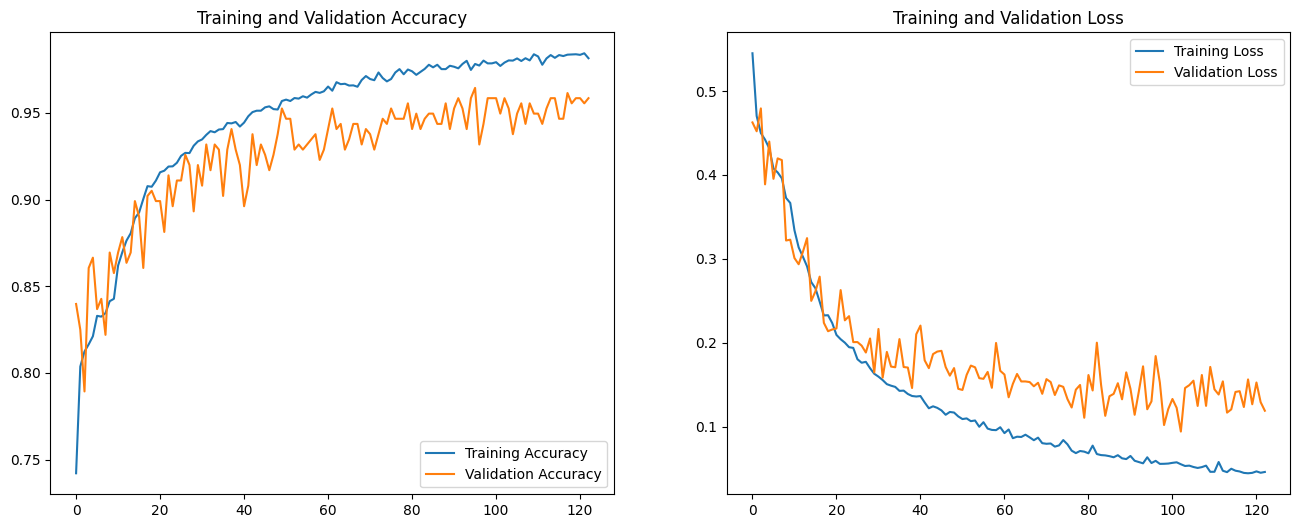

In [10]:
# Plotting the model results

# Getting the accuracy
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Getting the losses
loss = history.history['loss']
val_loss = history.history['val_loss']

# No of epochs it trained
epochs_range = history.epoch

# Plotting Training and Validation accuracy
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

#Plotting Training and Validation Loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [11]:
# Loading the test data using Image Data Generator
test_gen = datagen.flow_from_directory(
  "../dataset_used/Cancer_test/", 
  target_size=(128,128), 
  class_mode="categorical", 
  batch_size=1, 
  shuffle=False
  )

Found 1187 images belonging to 2 classes.


In [12]:
pred = cancer_model.evaluate(test_gen)

1187/1187 [==============================] - 31s 26ms/step - loss: 0.2294 - accuracy: 0.9360


## save model

In [13]:
os.mkdir("../src/output/my_model")

In [14]:
cancer_model.save(filepath="../src/output/my_model/my-model-1.h5")

In [ ]:
#Let's Go ahead and test our model for few Images.

#Array to hold Input Images and their labels
test = []
labels = []

#Loading random 10 images
random_images = np.random.choice(data_test.index,10)

#For loop to read and store images
for i in random_images:
    #Finding their class to load from folder
    label = data_test.loc[i,"class"]
    labels.append(label)
    if label == 1:
        lab = "malignant"
    else:
        lab = "benign"
    #Creating path
    path = os.path.join("../dataset_used/Cancer_test/", lab, i)
    #reading image
    img = cv2.imread(path)
    #resizing to target shape
    img = cv2.resize(img,(128,128))
    #Making it an numpy array
    img = np.array(img)
    #Appending it to the list
    test.append(img)

#Making the list as numpy array
test = np.asarray(test)
#rescaling it by pixel value
test = test/255.   

In [80]:
#Performing the prediction
pred = (cancer_model.predict(test) > 0.5).astype("int32")
#Flattening the list to form single dimensional list
pred = pred.flatten()

1/1 [==============================] - 1s 742ms/step


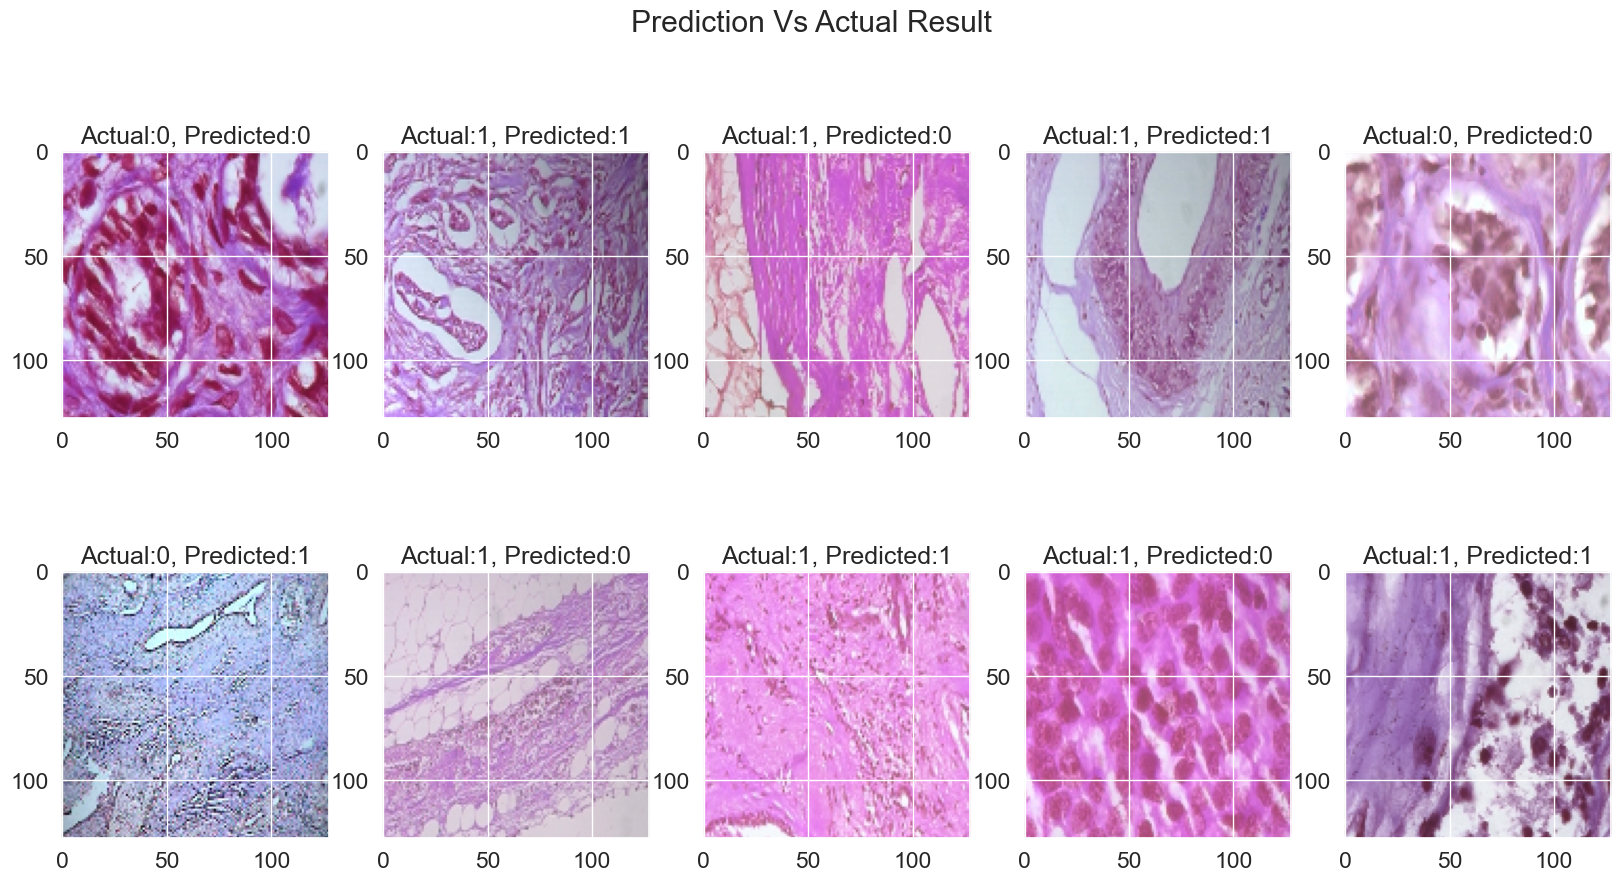

In [81]:
#Plotting results and actual prediction
plt.figure(figsize=(20,10))
plt.suptitle("Prediction Vs Actual Result")
for i in range(0,10):
    string = "Actual:" + str(labels[i]) + ", Predicted:" + str(pred[i])
    plt.subplot(2,5,i+1)
    plt.imshow(test[i])
    plt.title(string)